EDA Analysis

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("/kaggle/input/nlp-personal-dataset/Question Answer Classification Dataset 1 Training.csv")

In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns)
print("\nFirst 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (279999, 2)

Column names: Index(['QA Text', 'Class'], dtype='object')

First 5 rows:
                                              QA Text                   Class
0  Question Title:\nHave you liked a person who i...  Family & Relationships
1  Question Title:\nwhat is simulation?\nQuestion...   Science & Mathematics
2  Question Title:\nhelp to  loose weight?\nQuest...                  Health
3  Question Title:\nDid you know that the KKK ado...      Business & Finance
4  Question Title:\nhow can i find an old friend ...  Family & Relationships

Data types:
 QA Text    object
Class      object
dtype: object

Missing values:
 QA Text    0
Class      0
dtype: int64


Class Distribution

In [4]:
print("\nClass Distribution")
print(df['Class'].value_counts())


Class Distribution
Class
Society & Culture         28210
Sports                    28148
Politics & Government     28142
Family & Relationships    28133
Health                    28047
Computers & Internet      27966
Entertainment & Music     27962
Science & Mathematics     27915
Education & Reference     27751
Business & Finance        27725
Name: count, dtype: int64


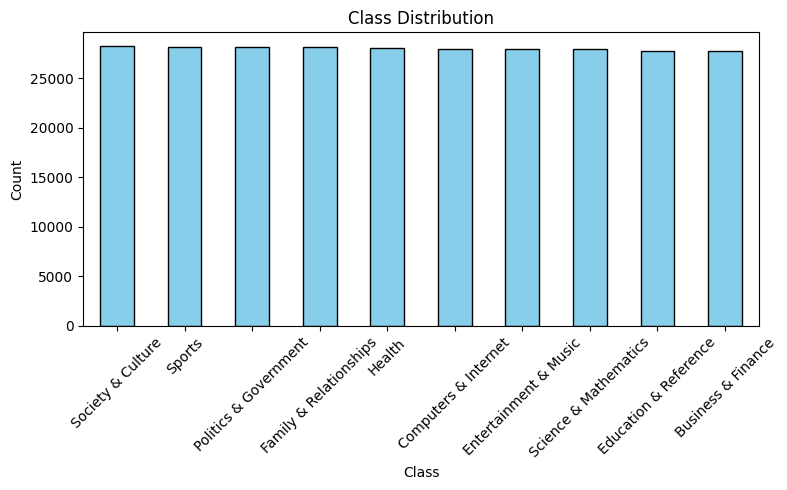

In [5]:
#class distribution plot
import matplotlib.pyplot as plt
class_counts = df['Class'].value_counts()

plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text Length Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


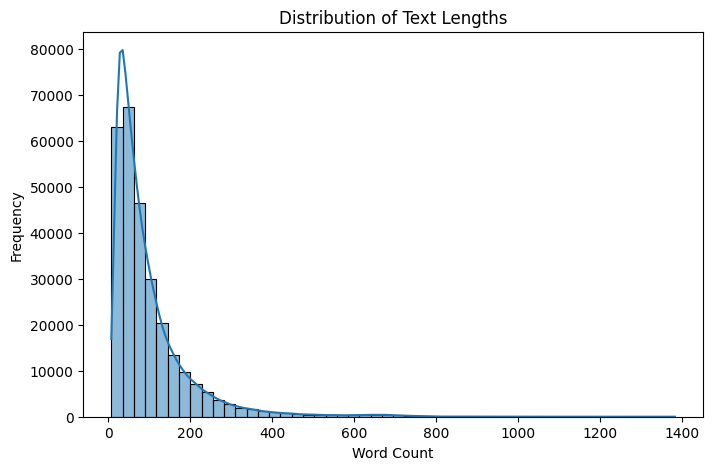

In [6]:
#text length distribution
import seaborn as sns
df["text_length"] = df["QA Text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

Frequently apprearing words

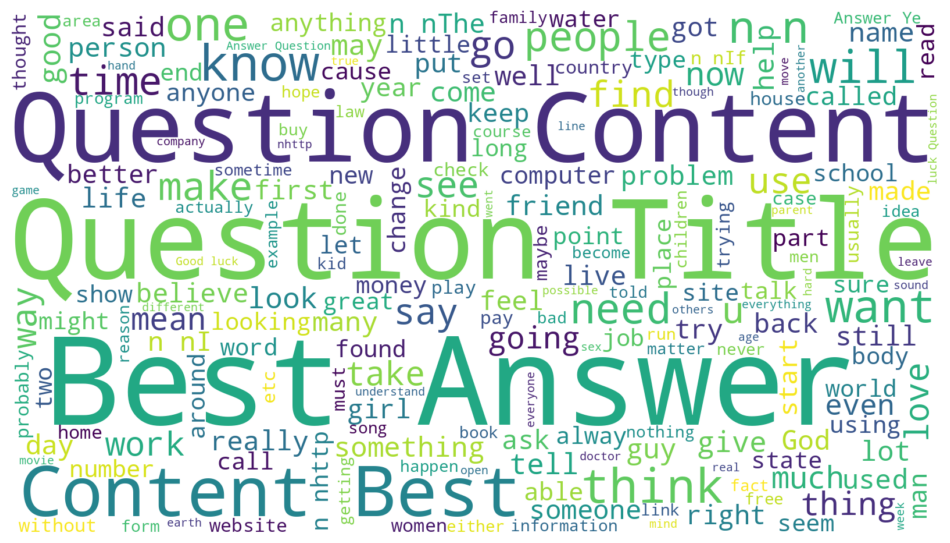

In [7]:
#frequently apprearing words
from wordcloud import WordCloud

text = " ".join(df["QA Text"].astype(str))

wordcloud = WordCloud(width=1600, height=900, background_color='white').generate(text)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Correlation between text length and class

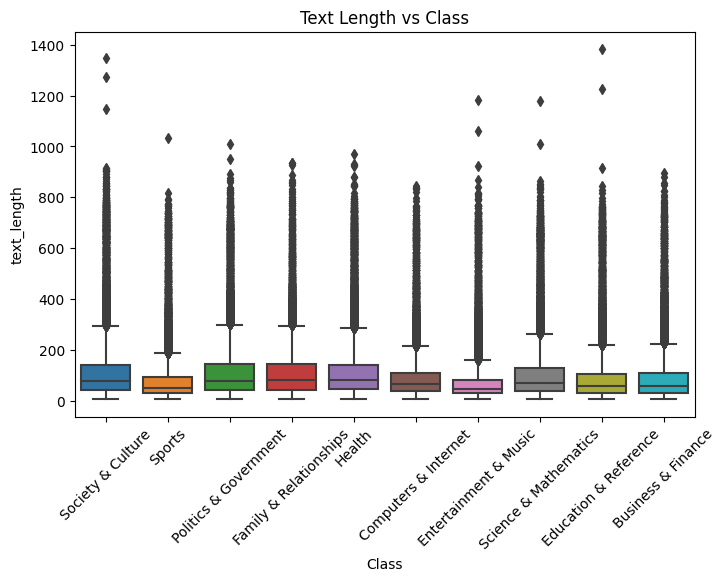

In [8]:
#Correlation between text length and class
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x="Class", y="text_length", data=df, order=df["Class"].value_counts().index)
plt.title("Text Length vs Class")
plt.xticks(rotation=45)
plt.show()

Data Pre-Processing

In [9]:
df.tail(5)

,QA Text,Class,text_length
279994,Question Title:\nhow do i know if he's the one...,Family & Relationships,66
279995,Question Title:\nSometimes I get upset at my g...,Family & Relationships,84
279996,"Question Title:\nIn fact, how much will the Bl...",Society & Culture,27
279997,Question Title:\nlist of germany national team...,Sports,26
279998,Question Title:\nHow can I find out what Lawye...,Politics & Government,51


Removing Question Title

In [10]:
# Removing "Question Title
df["QA Text"] = df["QA Text"].str.replace(r"^Question Title\s*", "", regex=True)
print(df["QA Text"].head(10))

0    :\nHave you liked a person who is bi-sexual an...
1    :\nwhat is simulation?\nQuestion Content:\n\nB...
2    :\nhelp to  loose weight?\nQuestion Content:\n...
3    :\nDid you know that the KKK adopted a highway...
4    :\nhow can i find an old friend in the uk?\nQu...
5    :\nbest low start up cost business idea?\nQues...
6    :\nWhat makes  you the happiest in a relations...
7    :\nHow good is Comcast HDTV?\nQuestion Content...
8    :\nHow come im so dumb with everything that i ...
9    :\ni love foto woman alder me?\nQuestion Conte...
Name: QA Text, dtype: object


In [11]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download("omw-1.4")

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
stop_words.append("question")

def remove_punct(text):
    return re.sub(r"[^a-z\s]", " ", text)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [12]:
df['QA Text'] = df['QA Text'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# 1. Convert to lowercase
df['QA Text'] = df['QA Text'].apply(lambda x: x.lower())

# 2. Remove punctuation
df['QA Text'] = df['QA Text'].apply(lambda x: remove_punct(x))

# 3. Split into words
df['QA Text'] = df['QA Text'].apply(lambda x: x.split())

# 4. Remove stopwords
df['QA Text'] = df['QA Text'].apply(lambda words: [word for word in words if word not in stop_words])

# 5. Apply stemming
df['QA Text'] = df['QA Text'].apply(lambda words: [stemmer.stem(word) for word in words])

# 6. Apply lemmatization
df['QA Text'] = df['QA Text'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])

# 7. Join words back into a single string
df['QA Text'] = df['QA Text'].apply(lambda words: " ".join(words))

print(df.head())

                                             QA Text                   Class  \
0  like person bi sexual get relationship go cont...  Family & Relationships   
1  simul content best answer mean simul phenomeno...   Science & Mathematics   
2  help loo weight content best answer burn calor...                  Health   
3  know kkk adopt highway content best answer ye ...      Business & Finance   
4  find old friend uk content best answer tri fri...  Family & Relationships   

   text_length  
0           39  
1           33  
2           25  
3           24  
4           19  


In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# vocabulary size
bow_check = CountVectorizer()
bow_check.fit(df['QA Text'])
print(f"Total vocabulary size: {len(bow_check.get_feature_names_out())}")

Total vocabulary size: 235278


BoW

In [14]:
from collections import Counter

# Fixed Vocabulary
def build_fixed_vocab(texts, vocab_size=5000, min_word_freq=2):
    """Build a fixed vocabulary of top-N frequent words"""
    word_counter = Counter()
    for text in texts:
        word_counter.update(text.split())

    # Keep only words that appear >= min_word_freq
    filtered = {word: count for word, count in word_counter.items() if count >= min_word_freq}

    # Selecting top vocab_size words
    most_common = [word for word, _ in Counter(filtered).most_common(vocab_size)]
    print(f"Original vocab size: {len(word_counter)}")
    print(f"Reduced to {len(filtered)} words with min freq {min_word_freq}")
    print(f"Final fixed vocab size: {len(most_common)}")
    return most_common

# Build fixed vocab from training data
fixed_vocab = build_fixed_vocab(df["QA Text"].tolist(), vocab_size=5000, min_word_freq=2)

#  Transform with BoW
bow_vectorizer = CountVectorizer(vocabulary=fixed_vocab)
bow_matrix = bow_vectorizer.fit_transform(df["QA Text"])

print(f"BoW matrix shape: {bow_matrix.shape}")

Original vocab size: 235304
Reduced to 104363 words with min freq 2
Final fixed vocab size: 5000
BoW matrix shape: (279999, 5000)


TF-IDF

In [15]:
# 1. Build fixed vocab (same function as BoW)
def build_fixed_vocab(texts, vocab_size=5000, min_word_freq=2):
    word_counter = Counter()
    for text in texts:
        word_counter.update(text.split())
    filtered = {word: count for word, count in word_counter.items() if count >= min_word_freq}
    most_common = [word for word, _ in Counter(filtered).most_common(vocab_size)]
    return most_common

fixed_vocab = build_fixed_vocab(df["QA Text"].tolist(), vocab_size=5000, min_word_freq=2)

# 2. TF-IDF with fixed vocab
tfidf_vectorizer = TfidfVectorizer(vocabulary=fixed_vocab, ngram_range=(1,2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df["QA Text"])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (279999, 5000)


Glove

In [16]:
!rm -f glove.6B.zip*
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -o glove.6B.zip

# GloVe (100d version)
glove_path = "glove.6B.100d.txt"
embedding_dim = 100
embeddings_index = {}

with open(glove_path, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs

print("Loaded GloVe vectors:", len(embeddings_index))

#  embedding matrix for our vocab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['QA Text'])
word_index = tokenizer.word_index
print("Vocabulary size:", len(word_index))

# Convert texts to padded sequences
sequences = tokenizer.texts_to_sequences(df['QA Text'])
X_glove = pad_sequences(sequences, maxlen=100)  # maxlen = sequence length

# Embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("GloVe Embedding Matrix Shape:", embedding_matrix.shape)

--2025-11-05 13:19:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-05 13:19:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-05 13:19:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

Skipgram

In [17]:
from gensim.models import Word2Vec

sequences = tokenizer.texts_to_sequences(df['QA Text'])
index_word = {i: w for w, i in word_index.items()}

# Convert integer sequences to word sequences
sentences = [[index_word[i] for i in seq] for seq in sequences]

w2v_model = Word2Vec(
    sentences,
    vector_size=100,  # embedding dimension
    window=5,
    sg=1,             # 1 = Skip-gram, 0 = CBOW
    min_count=2,
    workers=4
)
skipgram_embedding= np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in w2v_model.wv:
        skipgram_embedding[i] = w2v_model.wv[word]
print("Skip-gram Embedding Matrix Shape:", skipgram_embedding.shape)

Skip-gram Embedding Matrix Shape: (235305, 100)


Logistic Regression & Naive Bayes using (BoW & TF-IDF)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, confusion_matrix

# Load Test Dataset
test_df = pd.read_csv("/kaggle/input/nlp-personal-dataset/Updated Question Answer Classification Dataset Test.csv")
test_df = test_df[["QA Text", "Class"]].rename(columns={"QA Text": "text", "Class": "label"})
test_df.dropna(inplace=True)

#Transform Test Data
X_test_bow = bow_vectorizer.transform(test_df["text"])
X_test_tfidf = tfidf_vectorizer.transform(test_df["text"])
y_test = test_df["label"]

# Training data (already preprocessed BoW + TF-IDF)
X_train_bow = bow_matrix
X_train_tfidf = tfidf_matrix
y_train = df["Class"] if "Class" in df.columns else df["label"]

Logistic Regression(BoW)


Logistic Regression (BoW)
Accuracy: 0.5137752295871598
F1-score (Macro): 0.5108649150910718
F1-score (Weighted): 0.5108632842138581
                        precision    recall  f1-score   support

    Business & Finance       0.33      0.37      0.35      6000
  Computers & Internet       0.78      0.67      0.72      6000
 Education & Reference       0.44      0.22      0.29      6000
 Entertainment & Music       0.41      0.63      0.49      6000
Family & Relationships       0.57      0.65      0.61      5999
                Health       0.75      0.41      0.53      6000
 Politics & Government       0.37      0.68      0.48      6000
 Science & Mathematics       0.62      0.45      0.52      6000
     Society & Culture       0.47      0.36      0.41      6000
                Sports       0.71      0.71      0.71      6000

              accuracy                           0.51     59999
             macro avg       0.55      0.51      0.51     59999
          weighted avg       0.55

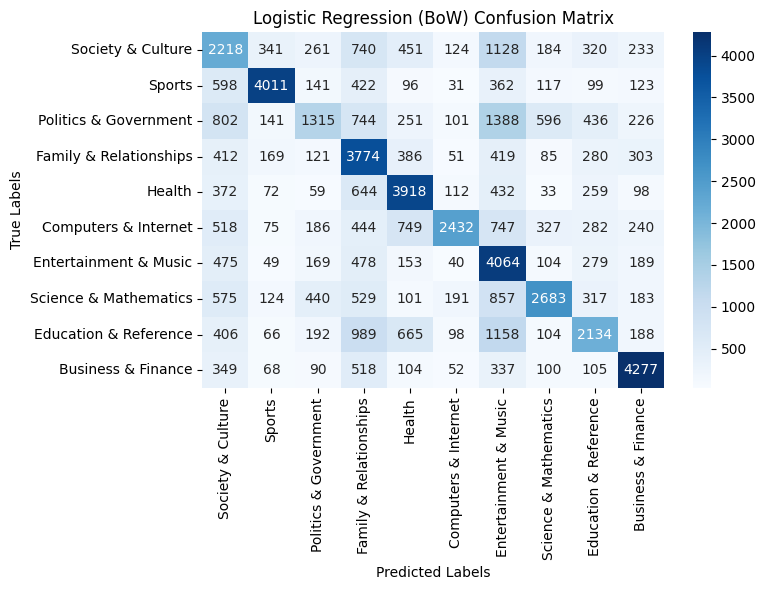

In [16]:
print("\nLogistic Regression (BoW)")
lr_bow = LogisticRegression(max_iter=1000, solver="liblinear")
lr_bow.fit(X_train_bow, y_train)
y_pred_lr_bow = lr_bow.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test, y_pred_lr_bow))
print("F1-score (Macro):", f1_score(y_test, y_pred_lr_bow, average="macro"))
print("F1-score (Weighted):", f1_score(y_test, y_pred_lr_bow, average="weighted"))
print(classification_report(y_test, y_pred_lr_bow))
cm= confusion_matrix(y_test, y_pred_lr_bow)

class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Logistic Regression (BoW) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Logistic Regression(TF-IDF)


Logistic Regression (TF-IDF)
Accuracy: 0.5678094634910582
F1-score (Macro): 0.5754816888263051
F1-score (Weighted): 0.5754805917181668
                        precision    recall  f1-score   support

    Business & Finance       0.30      0.55      0.39      6000
  Computers & Internet       0.81      0.73      0.77      6000
 Education & Reference       0.46      0.34      0.39      6000
 Entertainment & Music       0.49      0.63      0.55      6000
Family & Relationships       0.64      0.64      0.64      5999
                Health       0.81      0.52      0.63      6000
 Politics & Government       0.56      0.58      0.57      6000
 Science & Mathematics       0.67      0.55      0.61      6000
     Society & Culture       0.49      0.43      0.46      6000
                Sports       0.78      0.71      0.74      6000

              accuracy                           0.57     59999
             macro avg       0.60      0.57      0.58     59999
          weighted avg       0

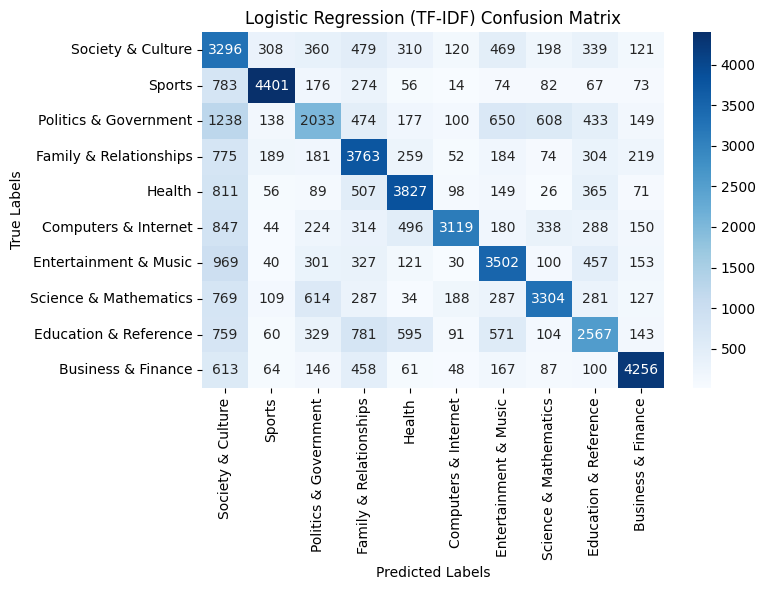

In [17]:
print("\nLogistic Regression (TF-IDF)")
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_lr_tfidf))
print("F1-score (Macro):", f1_score(y_test, y_pred_lr_tfidf, average="macro"))
print("F1-score (Weighted):", f1_score(y_test, y_pred_lr_tfidf, average="weighted"))
print(classification_report(y_test, y_pred_lr_tfidf))

cm= confusion_matrix(y_test, y_pred_lr_tfidf)

class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Logistic Regression (TF-IDF) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Naive Bayes(BoW)


Naive Bayes (BoW)
Accuracy: 0.5510591843197387
F1-score (Macro): 0.5488445461151803
F1-score (Weighted): 0.5488440625323197
                        precision    recall  f1-score   support

    Business & Finance       0.39      0.46      0.42      6000
  Computers & Internet       0.70      0.78      0.74      6000
 Education & Reference       0.44      0.28      0.34      6000
 Entertainment & Music       0.45      0.60      0.51      6000
Family & Relationships       0.46      0.76      0.58      5999
                Health       0.74      0.56      0.64      6000
 Politics & Government       0.59      0.51      0.55      6000
 Science & Mathematics       0.79      0.41      0.54      6000
     Society & Culture       0.43      0.46      0.45      6000
                Sports       0.76      0.69      0.73      6000

              accuracy                           0.55     59999
             macro avg       0.58      0.55      0.55     59999
          weighted avg       0.58      0.

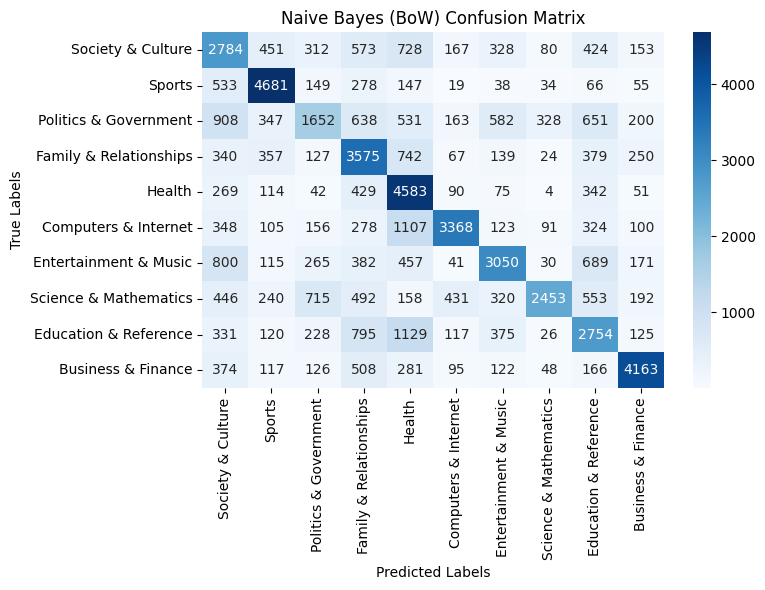

In [19]:
print("\nNaive Bayes (BoW)")
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
y_pred_nb_bow = nb_bow.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test, y_pred_nb_bow))
print("F1-score (Macro):", f1_score(y_test, y_pred_nb_bow, average="macro"))
print("F1-score (Weighted):", f1_score(y_test, y_pred_nb_bow, average="weighted"))
print(classification_report(y_test, y_pred_nb_bow))

cm= confusion_matrix(y_test, y_pred_nb_bow)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Naive Bayes (BoW) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Naive Bayes(TF-IDF)


Naive Bayes (TF-IDF)
Accuracy: 0.5482424707078452
F1-score (Macro): 0.5480644253841107
F1-score (Weighted): 0.548064106861288
                        precision    recall  f1-score   support

    Business & Finance       0.37      0.48      0.42      6000
  Computers & Internet       0.69      0.78      0.73      6000
 Education & Reference       0.47      0.27      0.34      6000
 Entertainment & Music       0.53      0.53      0.53      6000
Family & Relationships       0.46      0.75      0.57      5999
                Health       0.73      0.58      0.64      6000
 Politics & Government       0.53      0.54      0.54      6000
 Science & Mathematics       0.77      0.44      0.56      6000
     Society & Culture       0.40      0.46      0.43      6000
                Sports       0.82      0.65      0.73      6000

              accuracy                           0.55     59999
             macro avg       0.58      0.55      0.55     59999
          weighted avg       0.58      

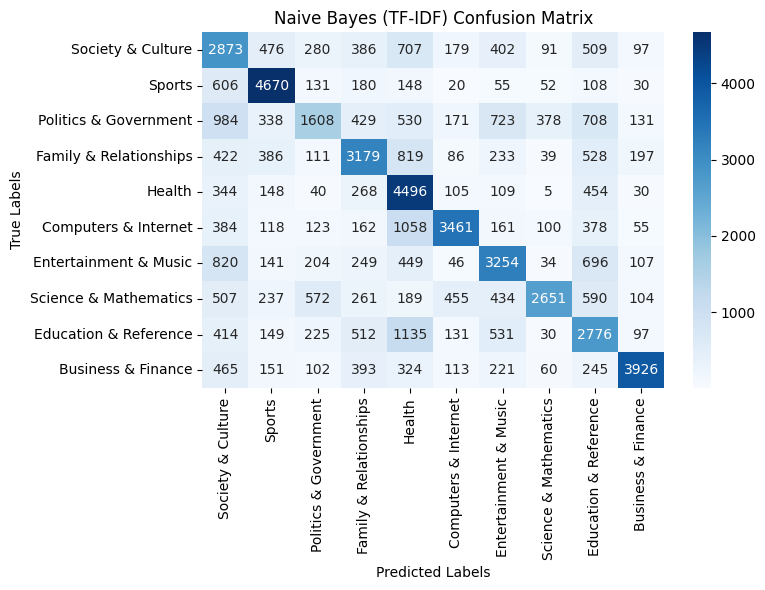

In [20]:
print("\nNaive Bayes (TF-IDF)")
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_nb_tfidf))
print("F1-score (Macro):", f1_score(y_test, y_pred_nb_tfidf, average="macro"))
print("F1-score (Weighted):", f1_score(y_test, y_pred_nb_tfidf, average="weighted"))
print(classification_report(y_test, y_pred_nb_tfidf))

cm= confusion_matrix(y_test, y_pred_nb_tfidf)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Naive Bayes (TF-IDF) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Random Forest (BoW)

In [23]:
from sklearn.ensemble import RandomForestClassifier
print("\nRandom Forest (BoW)")
rf_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bow.fit(X_train_bow, y_train)
y_pred_rf_bow = rf_bow.predict(X_test_bow)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_bow))
print("F1-score (Macro):", f1_score(y_test, y_pred_rf_bow, average="macro"))
print("F1-score (Weighted):", f1_score(y_test, y_pred_rf_bow, average="weighted"))
print(classification_report(y_test, y_pred_rf_bow))


Random Forest (BoW)
Accuracy: 0.5343089051484191
F1-score (Macro): 0.532172352248296
F1-score (Weighted): 0.5321712755713933
                        precision    recall  f1-score   support

    Business & Finance       0.35      0.42      0.38      6000
  Computers & Internet       0.66      0.75      0.70      6000
 Education & Reference       0.37      0.36      0.37      6000
 Entertainment & Music       0.46      0.50      0.48      6000
Family & Relationships       0.52      0.70      0.60      5999
                Health       0.61      0.61      0.61      6000
 Politics & Government       0.67      0.45      0.54      6000
 Science & Mathematics       0.54      0.55      0.54      6000
     Society & Culture       0.55      0.35      0.43      6000
                Sports       0.70      0.66      0.68      6000

              accuracy                           0.53     59999
             macro avg       0.54      0.53      0.53     59999
          weighted avg       0.54      0

Random Forest (TF-IDF)

In [24]:
print("\nRandom Forest (TF-IDF)")
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_rf_tfidf = rf_tfidf.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_tfidf))
print("F1-score (Macro):", f1_score(y_test, y_pred_rf_tfidf, average="macro"))
print("F1-score (Weighted):", f1_score(y_test, y_pred_rf_tfidf, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tfidf))
print(classification_report(y_test, y_pred_rf_tfidf))


Random Forest (TF-IDF)
Accuracy: 0.5213253554225904
F1-score (Macro): 0.5204241701339034
F1-score (Weighted): 0.520422696906743
Confusion Matrix:
 [[2315  621  579  441  342  272  307  652  293  178]
 [ 361 4409  275  227   67   74   34  355   47  151]
 [ 645  407 2122  372  191  260  341 1156  294  212]
 [ 413  383  427 2868  453  208  113  501  262  372]
 [ 312  177  262  428 3729  274  117  290  268  142]
 [ 286  121  309  256  456 3484   69  710  176  133]
 [ 657  220  511  354  167  209 2708  667  324  183]
 [ 376  215  634  248   68  342  108 3721  169  119]
 [ 404  202  640  619  629  311  252  690 2082  171]
 [ 335  168  307  423  149  146   84  469   78 3841]]
                        precision    recall  f1-score   support

    Business & Finance       0.38      0.39      0.38      6000
  Computers & Internet       0.64      0.73      0.68      6000
 Education & Reference       0.35      0.35      0.35      6000
 Entertainment & Music       0.46      0.48      0.47      6000


Deep Neural Network (BoW)


Deep Neural Network (BoW)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1762349260.510537      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
I0000 00:00:1762349287.800445     135 service.cc:148] XLA service 0x792db4004a90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762349287.801634     135 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762349288.013929     135 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1762349289.015748     135 device_compiler.h:1

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.5528758812646878
F1-score (Macro): 0.5678843341886185
F1-score (Weighted): 0.567882913221892
                        precision    recall  f1-score   support

    Business & Finance       0.28      0.56      0.37      6000
  Computers & Internet       0.84      0.68      0.75      6000
 Education & Reference       0.40      0.38      0.39      6000
 Entertainment & Music       0.55      0.56      0.56      6000
Family & Relationships       0.67      0.64      0.65      5999
                Health       0.79      0.53      0.64      6000
 Politics & Government       0.55      0.58      0.57      6000
 Science & Mathematics       0.74      0.44      0.55      6000
     Society & Culture       0.43      0.49      0.46      6000
                Sports       0.85      0.66      0.74      6000

              accuracy                           0.55     59999
             macro avg       0.61      0.55      0.57     59999
          weighted

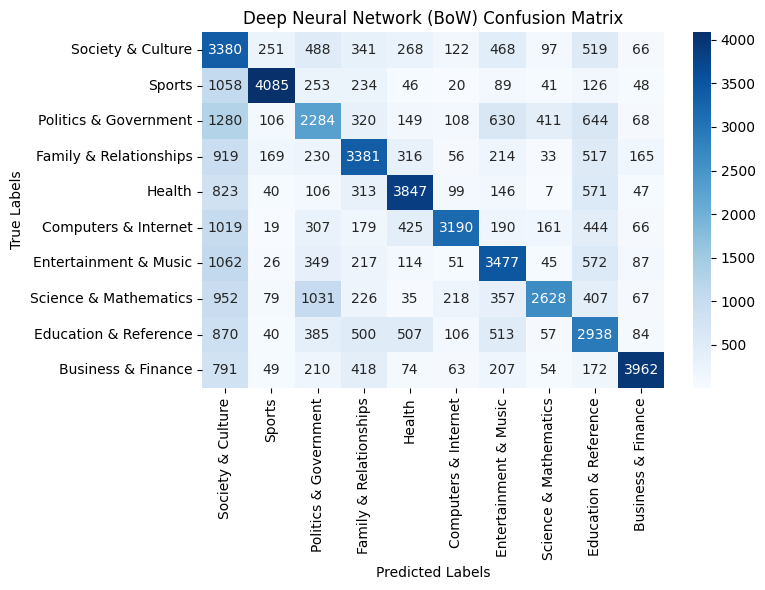

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

print("\nDeep Neural Network (BoW)")
model_dnn_bow = Sequential()
model_dnn_bow.add(Dense(128, activation='relu', input_shape=(X_train_bow.shape[1],)))
model_dnn_bow.add(Dropout(0.5))
model_dnn_bow.add(Dense(len(np.unique(y_train)), activation='softmax'))

model_dnn_bow.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

X_train_bow_arr = np.array(X_train_bow.toarray(), dtype="float32")
X_test_bow_arr  = np.array(X_test_bow.toarray(), dtype="float32")

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc  = label_encoder.transform(y_test)

# Train
model_dnn_bow.fit(X_train_bow_arr, y_train_enc, epochs=5, batch_size=32, verbose=0)

# Predict
y_pred_dnn_bow = np.argmax(model_dnn_bow.predict(X_test_bow_arr), axis=1)

# Evaluate
print("Accuracy:", accuracy_score(y_test_enc, y_pred_dnn_bow))
print("F1-score (Macro):", f1_score(y_test_enc, y_pred_dnn_bow, average="macro"))
print("F1-score (Weighted):", f1_score(y_test_enc, y_pred_dnn_bow, average="weighted"))
print(classification_report(y_test_enc, y_pred_dnn_bow, target_names=label_encoder.classes_))

cm= confusion_matrix(y_test_enc, y_pred_dnn_bow)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Deep Neural Network (BoW) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Deep Neural Network (TF-IDF)


Deep Neural Network (TF-IDF)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.566626110435174
F1-score (Macro): 0.5731976738423156
F1-score (Weighted): 0.573196411498222
                        precision    recall  f1-score   support

    Business & Finance       0.39      0.44      0.41      6000
  Computers & Internet       0.81      0.73      0.77      6000
 Education & Reference       0.38      0.42      0.40      6000
 Entertainment & Music       0.45      0.65      0.53      6000
Family & Relationships       0.65      0.65      0.65      5999
                Health       0.81      0.52      0.63      6000
 Politics & Government       0.52      0.62      0.56      6000
 Science & Mathematics       0.68      0.49      0.57      6000
     Society & Culture       0.44      0.47      0.45      6000
                Sports       0.82      0.69      0.75      6000

              accuracy                           0.57     59999
             macro avg       0.60      0.57      0.57     59999
          weighted 

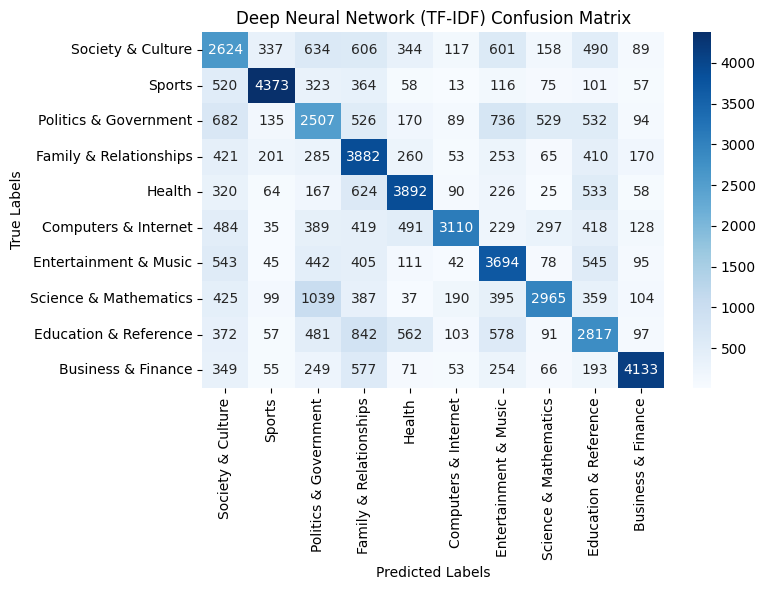

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

print("\nDeep Neural Network (TF-IDF)")
model_dnn_tfidf = Sequential()
model_dnn_tfidf.add(Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model_dnn_tfidf.add(Dropout(0.5))
model_dnn_tfidf.add(Dense(len(np.unique(y_train)), activation='softmax'))

model_dnn_tfidf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convert TF-IDF to dense arrays
X_train_tfidf_arr = np.array(X_train_tfidf.toarray(), dtype="float32")
X_test_tfidf_arr  = np.array(X_test_tfidf.toarray(), dtype="float32")

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc  = label_encoder.transform(y_test)

# Train
model_dnn_tfidf.fit(X_train_tfidf_arr, y_train_enc, epochs=5, batch_size=32, verbose=0)

# Predict
y_pred_dnn_tfidf = np.argmax(model_dnn_tfidf.predict(X_test_tfidf_arr), axis=1)

# Evaluate
print("Accuracy:", accuracy_score(y_test_enc, y_pred_dnn_tfidf))
print("F1-score (Macro):", f1_score(y_test_enc, y_pred_dnn_tfidf, average="macro"))
print("F1-score (Weighted):", f1_score(y_test_enc, y_pred_dnn_tfidf, average="weighted"))
print(classification_report(y_test_enc, y_pred_dnn_tfidf, target_names=label_encoder.classes_))

cm= confusion_matrix(y_test_enc, y_pred_dnn_tfidf)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Deep Neural Network (TF-IDF) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

GRU Glove

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
GRU Accuracy: 0.5982266371106185
GRU F1 (macro): 0.6107789619931753
GRU F1 (weighted): 0.6107782968740464

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.42      0.46      6000
           1       0.86      0.72      0.79      6000
           2       0.43      0.39      0.41      6000
           3       0.67      0.56      0.61      6000
           4       0.59      0.72      0.65      5999
           5       0.77      0.61      0.68      6000
           6       0.70      0.61      0.66      6000
           7       0.76      0.52      0.62      6000
           8       0.32      0.71      0.44      6000
           9       0.91      0.72      0.80      6000

    accuracy                           0.60     59999
   macro avg       0.65      0.60      0.61     59999
weighted avg       0.65      0.60      0.61     59999



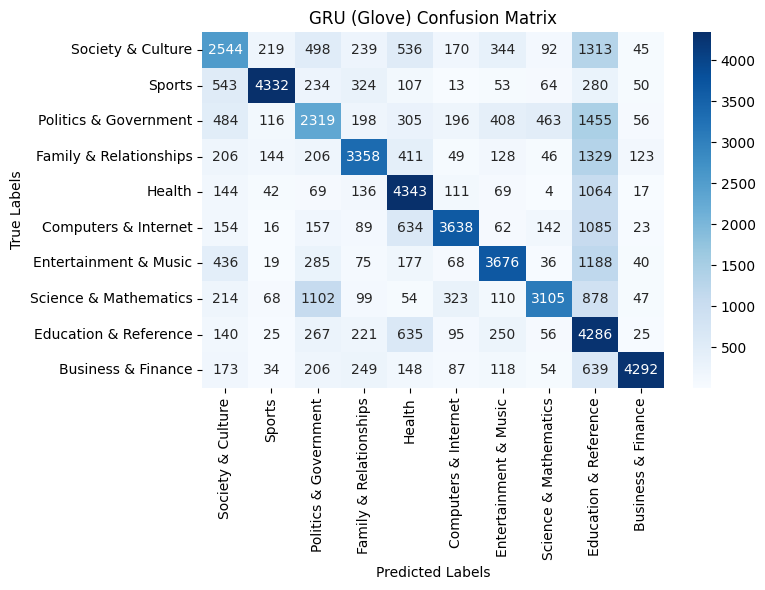

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GRU
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = df["QA Text"].astype(str).tolist()
labels = df["Class"].values

#Tokenizer for GloVe embedding
tokenizer_glove = Tokenizer(num_words=embedding_matrix.shape[0])
tokenizer_glove.fit_on_texts(texts) # Fit tokenizer on training data
sequences_glove = tokenizer_glove.texts_to_sequences(texts)
MAX_SEQUENCE_LENGTH = 100
X_train_glove=pad_sequences(sequences_glove, maxlen=MAX_SEQUENCE_LENGTH)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
num_classes = len(np.unique(y))
y_train_cat=to_categorical(y, num_classes=num_classes)

test_df = pd.read_csv("/kaggle/input/nlp-personal-dataset/Updated Question Answer Classification Dataset Test.csv")

# Preprocess test data for GloVe
X_test_glove = test_df["QA Text"].astype(str).tolist()
X_test_glove = tokenizer_glove.texts_to_sequences(X_test_glove)
X_test_glove = pad_sequences(X_test_glove, maxlen=MAX_SEQUENCE_LENGTH)

y_test_labels = test_df["Class"].values
y_test_cat = to_categorical(label_encoder.transform(y_test_labels), num_classes=num_classes)


# Build GRU model
vocab_size, embedding_dim = embedding_matrix.shape
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=X_train_glove.shape[1],
                        trainable=False))
model_gru.add(GRU(128))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(y_train_cat.shape[1], activation="softmax"))

model_gru.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_gru.fit(X_train_glove, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_gru.predict(X_test_glove)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("GRU Accuracy:", accuracy_score(y_true, y_pred))
print("GRU F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("GRU F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("GRU (Glove) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

GRU Skip-gram

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
GRU Accuracy: 0.5063251054184237
GRU F1 (macro): 0.5084093197407796
GRU F1 (weighted): 0.5084102948791159

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.44      0.39      6000
           1       0.65      0.78      0.71      6000
           2       0.47      0.30      0.37      6000
           3       0.37      0.66      0.48      6000
           4       0.73      0.33      0.45      5999
           5       0.85      0.32      0.47      6000
           6       0.49      0.60      0.54      6000
           7       0.69      0.45      0.55      6000
           8       0.32      0.55      0.40      6000
           9       0.86      0.64      0.73      6000

    accuracy                           0.51     59999
   macro avg       0.58      0.51      0.51     59999
weighted avg       0.58      0.51      0.51     59999



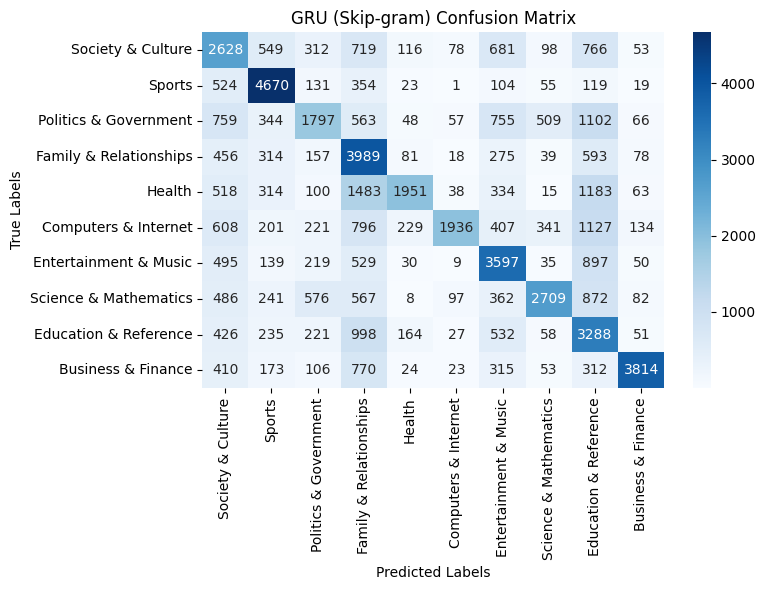

In [24]:
#Tokenizer for skipgram embedding
tokenizer_skipgram = Tokenizer(num_words=skipgram_embedding.shape[0])
tokenizer_skipgram.fit_on_texts(texts) # Fit tokenizer on training data
sequences_skipgram = tokenizer_skipgram.texts_to_sequences(texts)
MAX_SEQUENCE_LENGTH = 100
X_train_skipgram =pad_sequences(sequences_skipgram, maxlen=MAX_SEQUENCE_LENGTH)

# Preprocess test data for Skipgram
X_test_skipgram = test_df["QA Text"].astype(str).tolist()
X_test_skipgram = tokenizer_skipgram.texts_to_sequences(X_test_skipgram)
X_test_skipgram = pad_sequences(X_test_skipgram, maxlen=MAX_SEQUENCE_LENGTH)

# Build GRU model
vocab_size, skipgram_embedding_dim = skipgram_embedding.shape
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size,
                        output_dim=skipgram_embedding_dim,
                        weights=[skipgram_embedding],
                        input_length=X_train_skipgram.shape[1],
                        trainable=False))
model_gru.add(GRU(128))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(y_train_cat.shape[1], activation="softmax"))

model_gru.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_gru.fit(X_train_skipgram, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_gru.predict(X_test_skipgram)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("GRU Accuracy:", accuracy_score(y_true, y_pred))
print("GRU F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("GRU F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("GRU (Skip-gram) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Deep Neural Network Glove

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
DNN (GloVe) Accuracy: 0.3974399573326222
DNN (GloVe) F1 (macro): 0.38921954620915866
DNN (GloVe) F1 (weighted): 0.3892189127456019

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.08      0.14      6000
           1       0.77      0.49      0.60      6000
           2       0.38      0.13      0.20      6000
           3       0.58      0.24      0.34      6000
           4       0.32      0.65      0.43      5999
           5       0.67      0.35      0.46      6000
           6       0.23      0.86      0.37      6000
           7       0.56      0.52      0.54      6000
           8       0.35      0.31      0.33      6000
           9       0.96      0.34      0.50      6000

    accuracy                           0.40     59999
   macro avg       0.53      0.40      0.39     59999
weighted avg       0.53      0.40      0.39     59999



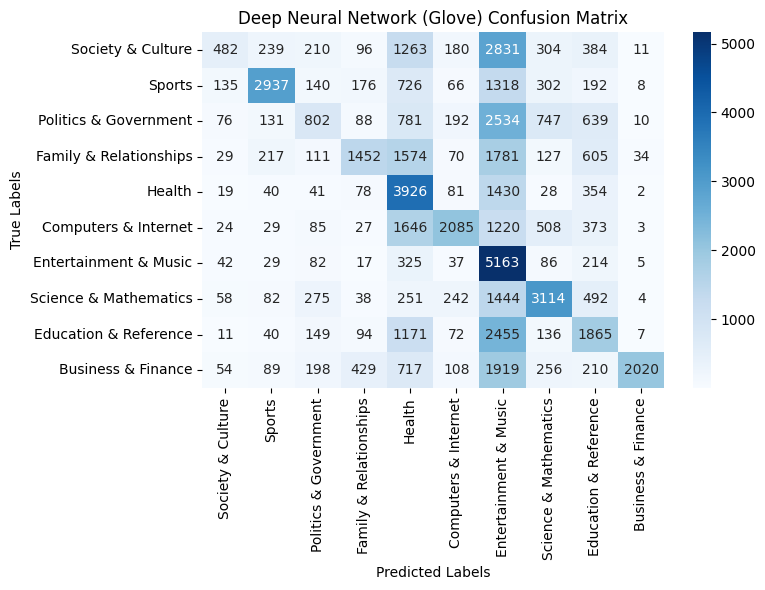

In [25]:
vocab_size, glove_embedding_dim = embedding_matrix.shape
model_dnn_glove = Sequential()
model_dnn_glove.add(Embedding(input_dim=vocab_size,
                              output_dim=embedding_dim,
                              weights=[embedding_matrix],
                              input_length=X_train_glove.shape[1],
                              trainable=False))
model_dnn_glove.add(Flatten())
model_dnn_glove.add(Dense(128, activation='relu'))
model_dnn_glove.add(Dropout(0.5))
model_dnn_glove.add(Dense(y_train_cat.shape[1], activation='softmax'))

model_dnn_glove.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_dnn_glove.fit(X_train_glove, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_dnn_glove.predict(X_test_glove)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("DNN (GloVe) Accuracy:", accuracy_score(y_true, y_pred))
print("DNN (GloVe) F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("DNN (GloVe) F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Deep Neural Network (Glove) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Deep Neural Network Skipgram

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
DNN (Skip-gram) Accuracy: 0.41349022483708064
DNN (Skip-gram) F1 (macro): 0.39875538939667815
DNN (Skip-gram) F1 (weighted): 0.3987546829743147

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.09      0.15      6000
           1       0.70      0.64      0.67      6000
           2       0.37      0.10      0.16      6000
           3       0.31      0.57      0.40      6000
           4       0.58      0.36      0.44      5999
           5       0.72      0.34      0.46      6000
           6       0.34      0.57      0.42      6000
           7       0.71      0.29      0.41      6000
           8       0.22      0.47      0.30      6000
           9       0.47      0.71      0.57      6000

    accuracy                           0.41     59999
   macro avg       0.48      0.41      0.40     59999
weighted avg       0.48      0.41      0.40     59999



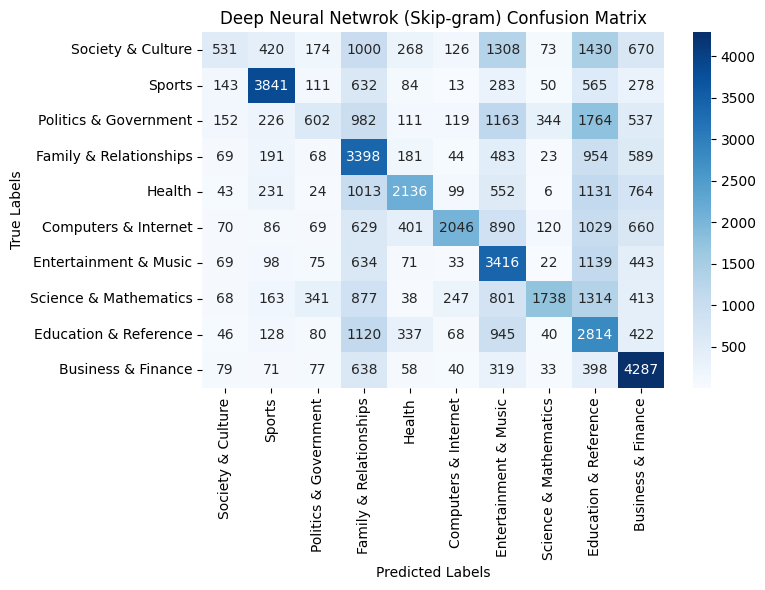

In [26]:
vocab_size, skipgram_embedding_dim = skipgram_embedding.shape
model_dnn_skipgram = Sequential()
model_dnn_skipgram.add(Embedding(input_dim=vocab_size,
                                  output_dim=skipgram_embedding_dim,
                                  weights=[skipgram_embedding],
                                  input_length=X_train_skipgram.shape[1],
                                  trainable=False))
model_dnn_skipgram.add(Flatten())
model_dnn_skipgram.add(Dense(128, activation='relu'))
model_dnn_skipgram.add(Dropout(0.5))
model_dnn_skipgram.add(Dense(y_train_cat.shape[1], activation='softmax'))

model_dnn_skipgram.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_dnn_skipgram.fit(X_train_skipgram, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_dnn_skipgram.predict(X_test_skipgram)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("DNN (Skip-gram) Accuracy:", accuracy_score(y_true, y_pred))
print("DNN (Skip-gram) F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("DNN (Skip-gram) F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Deep Neural Netwrok (Skip-gram) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

RNN Glove

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
RNN (GloVe) Accuracy: 0.2564376072934549
RNN (GloVe) F1 (macro): 0.21834138997259028
RNN (GloVe) F1 (weighted): 0.21834175290752933

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.01      0.01      6000
           1       0.31      0.55      0.40      6000
           2       0.10      0.01      0.01      6000
           3       0.38      0.02      0.04      6000
           4       0.25      0.16      0.20      5999
           5       0.26      0.33      0.29      6000
           6       0.19      0.37      0.25      6000
           7       0.36      0.25      0.30      6000
           8       0.16      0.42      0.23      6000
           9       0.44      0.46      0.45      6000

    accuracy                           0.26     59999
   macro avg       0.27      0.26      0.22     59999
weighted avg       0.27      0.26      0.22     59999



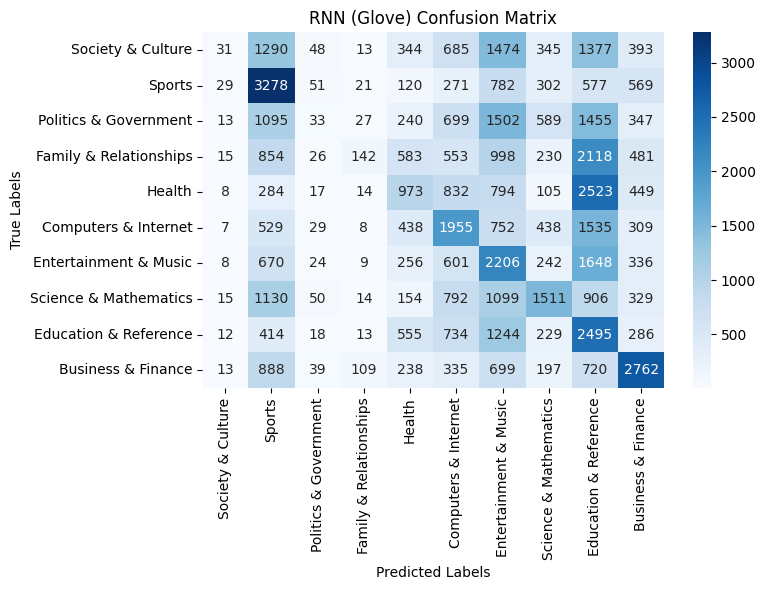

In [27]:
from tensorflow.keras.layers import SimpleRNN

vocab_size, embedding_dim = embedding_matrix.shape
model_rnn_glove = Sequential()
model_rnn_glove.add(Embedding(input_dim=vocab_size,
                              output_dim=embedding_dim,
                              weights=[embedding_matrix],
                              input_length=X_train_glove.shape[1],
                              trainable=False))
model_rnn_glove.add(SimpleRNN(128))
model_rnn_glove.add(Dropout(0.5))
model_rnn_glove.add(Dense(y_train_cat.shape[1], activation='softmax'))

model_rnn_glove.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_rnn_glove.fit(X_train_glove, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_rnn_glove.predict(X_test_glove)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("RNN (GloVe) Accuracy:", accuracy_score(y_true, y_pred))
print("RNN (GloVe) F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("RNN (GloVe) F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("RNN (Glove) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

RNN Skipgram

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
RNN (Skip-gram) Accuracy: 0.3338555642594043
RNN (Skip-gram) F1 (macro): 0.29755682419077717
RNN (Skip-gram) F1 (weighted): 0.2975559741697975

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.03      0.04      6000
           1       0.49      0.76      0.59      6000
           2       0.19      0.04      0.07      6000
           3       0.30      0.09      0.14      6000
           4       0.28      0.46      0.35      5999
           5       0.49      0.26      0.34      6000
           6       0.25      0.57      0.35      6000
           7       0.39      0.41      0.40      6000
           8       0.20      0.26      0.23      6000
           9       0.48      0.47      0.47      6000

    accuracy                           0.33     59999
   macro avg       0.32      0.33      0.30     59999
weighted avg       0.32      0.33      0.30     59999



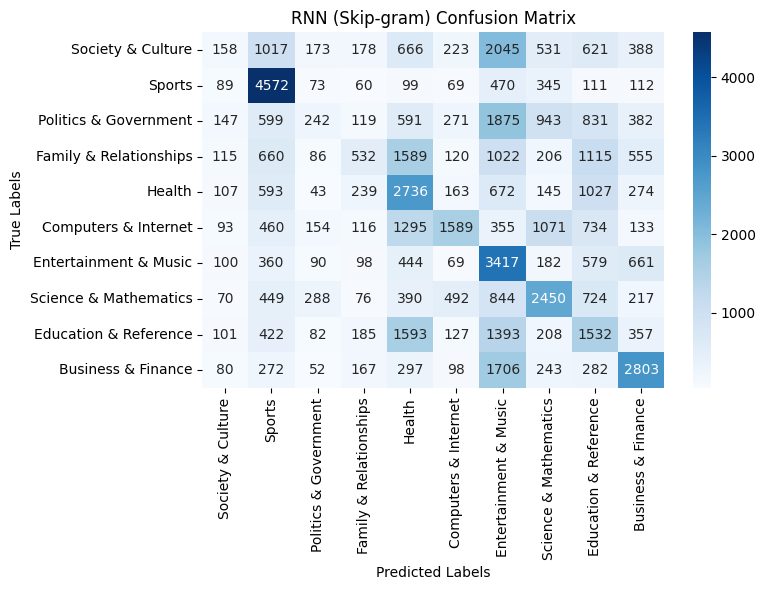

In [28]:
vocab_size, skipgram_embedding_dim = skipgram_embedding.shape
model_rnn_skipgram = Sequential()
model_rnn_skipgram.add(Embedding(input_dim=vocab_size,
                                  output_dim=skipgram_embedding_dim,
                                  weights=[skipgram_embedding],
                                  input_length=X_train_skipgram.shape[1],
                                  trainable=False))
model_rnn_skipgram.add(SimpleRNN(128))
model_rnn_skipgram.add(Dropout(0.5))
model_rnn_skipgram.add(Dense(y_train_cat.shape[1], activation='softmax'))

model_rnn_skipgram.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_rnn_skipgram.fit(X_train_skipgram, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_rnn_skipgram.predict(X_test_skipgram)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("RNN (Skip-gram) Accuracy:", accuracy_score(y_true, y_pred))
print("RNN (Skip-gram) F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("RNN (Skip-gram) F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("RNN (Skip-gram) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

LSTM Glove

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
LSTM Accuracy: 0.6105935098918315
LSTM F1 (macro): 0.6149598017278137
LSTM F1 (weighted): 0.6149589776403872

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.45      0.46      6000
           1       0.83      0.75      0.79      6000
           2       0.56      0.29      0.38      6000
           3       0.66      0.56      0.61      6000
           4       0.61      0.73      0.66      5999
           5       0.75      0.63      0.68      6000
           6       0.63      0.71      0.67      6000
           7       0.67      0.67      0.67      6000
           8       0.35      0.65      0.45      6000
           9       0.94      0.67      0.78      6000

    accuracy                           0.61     59999
   macro avg       0.65      0.61      0.61     59999
weighted avg       0.65      0.61      0.61     59999



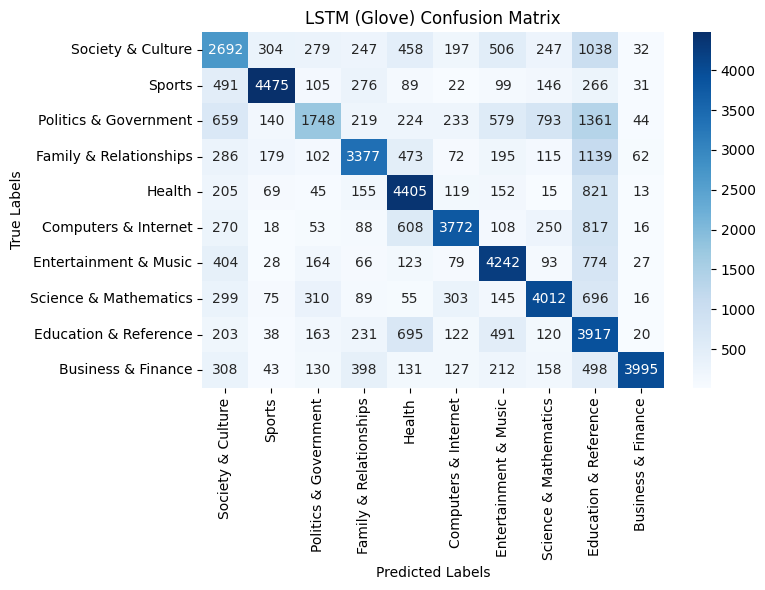

In [29]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Build LSTM model
vocab_size, embedding_dim = embedding_matrix.shape
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size,
                         output_dim=embedding_dim,
                         weights=[embedding_matrix],
                         input_length=X_train_glove.shape[1],
                         trainable=False))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(y_train_cat.shape[1], activation="softmax"))

model_lstm.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_lstm.fit(X_train_glove, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_lstm.predict(X_test_glove)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("LSTM Accuracy:", accuracy_score(y_true, y_pred))
print("LSTM F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("LSTM F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("LSTM (Glove) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

LSTM Skip-gram

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
LSTM Accuracy: 0.5048750812513542
LSTM F1 (macro): 0.5098540808695666
LSTM F1 (weighted): 0.5098552994420514

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.28      0.34      6000
           1       0.67      0.77      0.72      6000
           2       0.40      0.38      0.39      6000
           3       0.60      0.51      0.56      6000
           4       0.75      0.31      0.44      5999
           5       0.82      0.44      0.57      6000
           6       0.44      0.63      0.52      6000
           7       0.74      0.34      0.46      6000
           8       0.26      0.69      0.38      6000
           9       0.76      0.69      0.72      6000

    accuracy                           0.50     59999
   macro avg       0.59      0.50      0.51     59999
weighted avg       0.59      0.50      0.51     59999



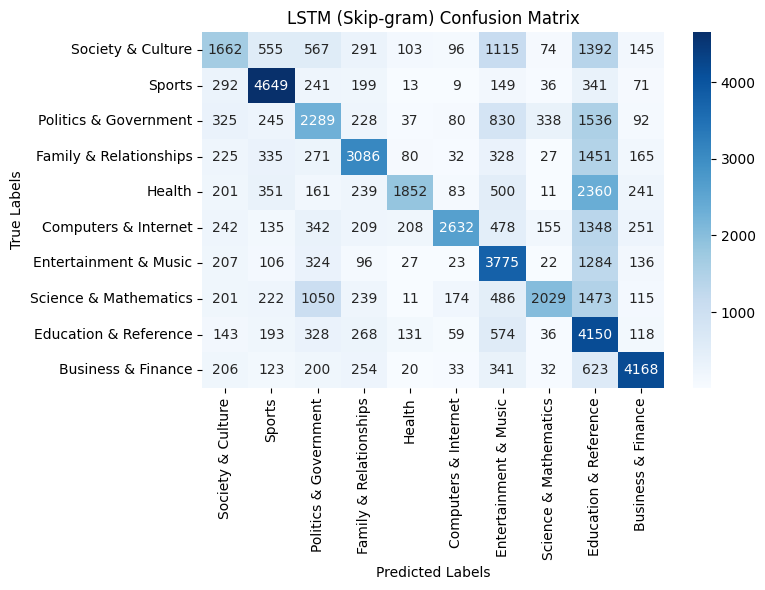

In [30]:
from tensorflow.keras.layers import LSTM
# Build LSTM model
vocab_size, skipgram_embedding_dim = skipgram_embedding.shape
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size,
                         output_dim=skipgram_embedding_dim,
                         weights=[skipgram_embedding],
                         input_length=X_train_skipgram.shape[1],
                         trainable=False))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(y_train_cat.shape[1], activation="softmax"))

model_lstm.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_lstm.fit(X_train_skipgram, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_lstm.predict(X_test_skipgram)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("LSTM Accuracy:", accuracy_score(y_true, y_pred))
print("LSTM F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("LSTM F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("LSTM (Skip-gram) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Bidirectional RNN Glove

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step
BiRNN Accuracy: 0.22505375089584825
BiRNN F1 (macro): 0.20072241812382977
BiRNN F1 (weighted): 0.20072096322222324

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6000
           1       0.34      0.21      0.26      6000
           2       0.15      0.06      0.09      6000
           3       0.28      0.07      0.11      6000
           4       0.21      0.46      0.29      5999
           5       0.28      0.23      0.25      6000
           6       0.18      0.35      0.24      6000
           7       0.26      0.44      0.33      6000
           8       0.15      0.27      0.19      6000
           9       0.55      0.16      0.25      6000

    accuracy                           0.23     59999
   macro avg       0.24      0.23      0.20     59999
weighted avg       0.24      0.23      0.20     59999



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


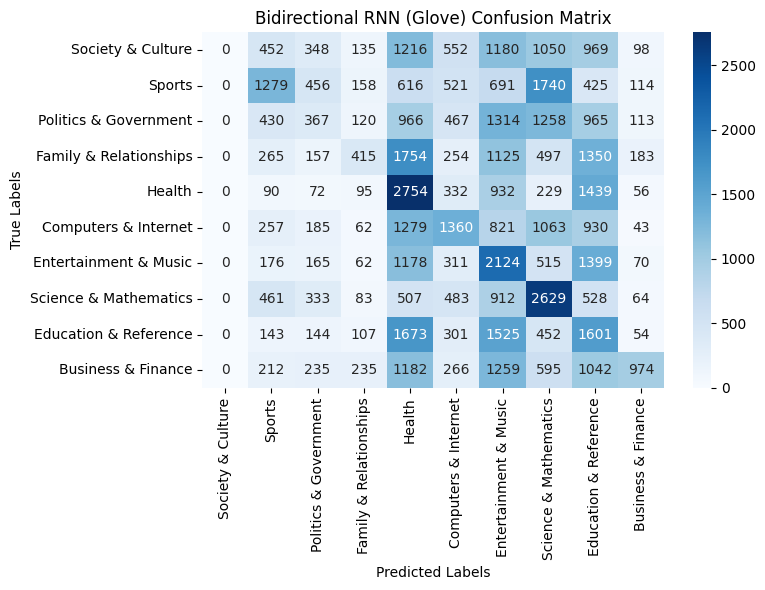

In [31]:
from tensorflow.keras.layers import SimpleRNN, Bidirectional

# Build BiRNN model
model_birnn = Sequential()
model_birnn.add(Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          weights=[embedding_matrix],
                          input_length=X_train_glove.shape[1],
                          trainable=False))
model_birnn.add(Bidirectional(SimpleRNN(128)))
model_birnn.add(Dropout(0.5))
model_birnn.add(Dense(y_train_cat.shape[1], activation="softmax"))

model_birnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_birnn.fit(X_train_glove, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_birnn.predict(X_test_glove)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("BiRNN Accuracy:", accuracy_score(y_true, y_pred))
print("BiRNN F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("BiRNN F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Bidirectional RNN (Glove) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

BiRNN Skipgram

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
BiRNN Accuracy: 0.251520858680978
BiRNN F1 (macro): 0.24172703581440746
BiRNN F1 (weighted): 0.24172868118384516

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.04      0.07      6000
           1       0.64      0.43      0.52      6000
           2       0.16      0.16      0.16      6000
           3       0.15      0.47      0.23      6000
           4       0.14      0.15      0.14      5999
           5       0.46      0.17      0.25      6000
           6       0.20      0.36      0.26      6000
           7       0.55      0.12      0.20      6000
           8       0.30      0.07      0.11      6000
           9       0.43      0.53      0.47      6000

    accuracy                           0.25     59999
   macro avg       0.32      0.25      0.24     59999
weighted avg       0.32      0.25      0.24     59999



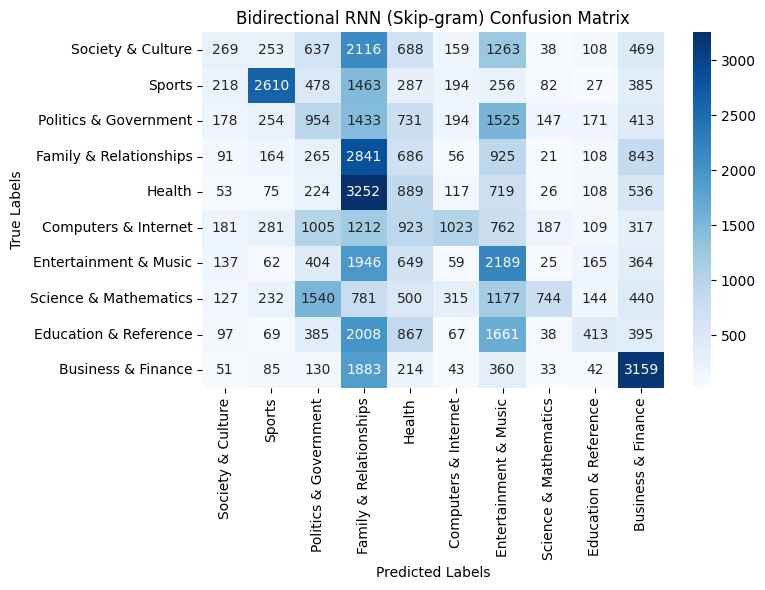

In [32]:
from tensorflow.keras.layers import SimpleRNN, Bidirectional
# Build BiRNN model
model_birnn = Sequential()
model_birnn.add(Embedding(input_dim=vocab_size,
                          output_dim=skipgram_embedding_dim,
                          weights=[skipgram_embedding],
                          input_length=X_train_skipgram.shape[1],
                          trainable=False))
model_birnn.add(Bidirectional(SimpleRNN(128)))
model_birnn.add(Dropout(0.5))
model_birnn.add(Dense(y_train_cat.shape[1], activation="softmax"))

model_birnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_birnn.fit(X_train_skipgram, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_birnn.predict(X_test_skipgram)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("BiRNN Accuracy:", accuracy_score(y_true, y_pred))
print("BiRNN F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("BiRNN F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Bidirectional RNN (Skip-gram) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Bidirectional GRU Glove

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
BiGRU Accuracy: 0.6141269021150353
BiGRU F1 (macro): 0.6192507789218766
BiGRU F1 (weighted): 0.6192501013645273

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.56      0.44      6000
           1       0.82      0.78      0.80      6000
           2       0.53      0.32      0.40      6000
           3       0.52      0.70      0.60      6000
           4       0.66      0.66      0.66      5999
           5       0.77      0.62      0.68      6000
           6       0.74      0.55      0.63      6000
           7       0.69      0.63      0.66      6000
           8       0.47      0.57      0.51      6000
           9       0.89      0.74      0.81      6000

    accuracy                           0.61     59999
   macro avg       0.64      0.61      0.62     59999
weighted avg       0.64      0.61      0.62     59999



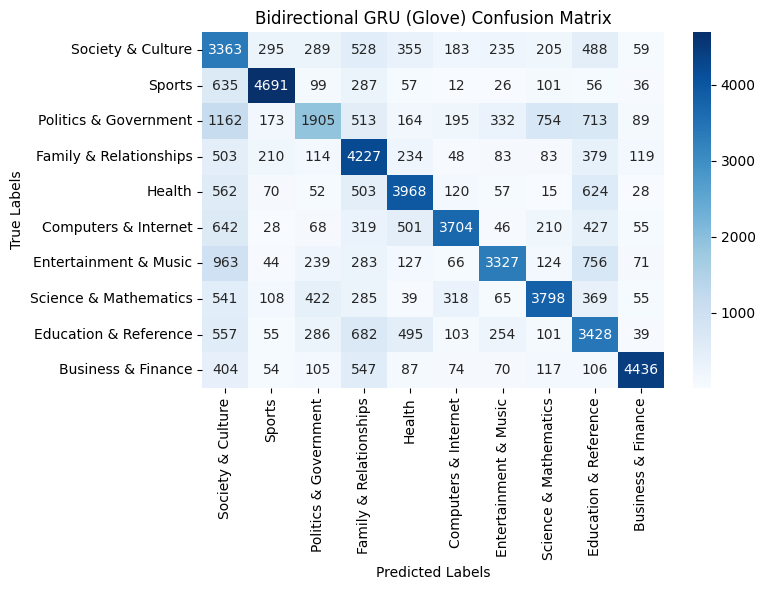

In [33]:
# Build BiGRU model
model_bigru = Sequential()
model_bigru.add(Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          weights=[embedding_matrix],
                          input_length=X_train_glove.shape[1],
                          trainable=False))
model_bigru.add(Bidirectional(GRU(128)))
model_bigru.add(Dropout(0.5))
model_bigru.add(Dense(y_train_cat.shape[1], activation="softmax"))

model_bigru.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_bigru.fit(X_train_glove, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_bigru.predict(X_test_glove)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("BiGRU Accuracy:", accuracy_score(y_true, y_pred))
print("BiGRU F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("BiGRU F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Bidirectional GRU (Glove) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

BiGRU Skipgram

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
BiGRU Accuracy: 0.4962416040267338
BiGRU F1 (macro): 0.49546335083932325
BiGRU F1 (weighted): 0.4954673756757056

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.36      0.38      6000
           1       0.76      0.71      0.73      6000
           2       0.49      0.30      0.37      6000
           3       0.44      0.64      0.52      6000
           4       0.82      0.15      0.25      5999
           5       0.85      0.36      0.51      6000
           6       0.44      0.67      0.53      6000
           7       0.65      0.48      0.55      6000
           8       0.26      0.65      0.37      6000
           9       0.84      0.65      0.73      6000

    accuracy                           0.50     59999
   macro avg       0.59      0.50      0.50     59999
weighted avg       0.59      0.50      0.50     59999



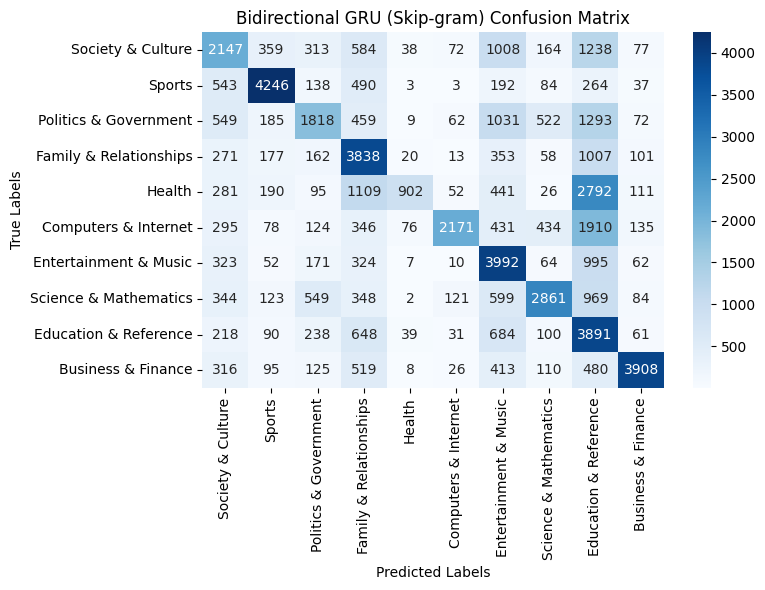

In [34]:
# Build BiGRU model
model_bigru = Sequential()
model_bigru.add(Embedding(input_dim=vocab_size,
                          output_dim=skipgram_embedding_dim,
                          weights=[skipgram_embedding],
                          input_length=X_train_skipgram.shape[1],
                          trainable=False))
model_bigru.add(Bidirectional(GRU(128)))
model_bigru.add(Dropout(0.5))
model_bigru.add(Dense(y_train_cat.shape[1], activation="softmax"))

model_bigru.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_bigru.fit(X_train_skipgram, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_bigru.predict(X_test_skipgram)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("BiGRU Accuracy:", accuracy_score(y_true, y_pred))
print("BiGRU F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("BiGRU F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Bidirectional GRU (Skip-gram) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

Bidirectional LSTM Glove

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
BiLSTM Accuracy: 0.6088268137802296
BiLSTM F1 (macro): 0.6117698610086573
BiLSTM F1 (weighted): 0.6117705967762315

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.43      0.45      6000
           1       0.77      0.83      0.80      6000
           2       0.45      0.41      0.43      6000
           3       0.67      0.53      0.59      6000
           4       0.43      0.85      0.57      5999
           5       0.77      0.60      0.68      6000
           6       0.73      0.58      0.65      6000
           7       0.66      0.67      0.66      6000
           8       0.51      0.49      0.50      6000
           9       0.93      0.69      0.79      6000

    accuracy                           0.61     59999
   macro avg       0.64      0.61      0.61     59999
weighted avg       0.64      0.61      0.61     59999



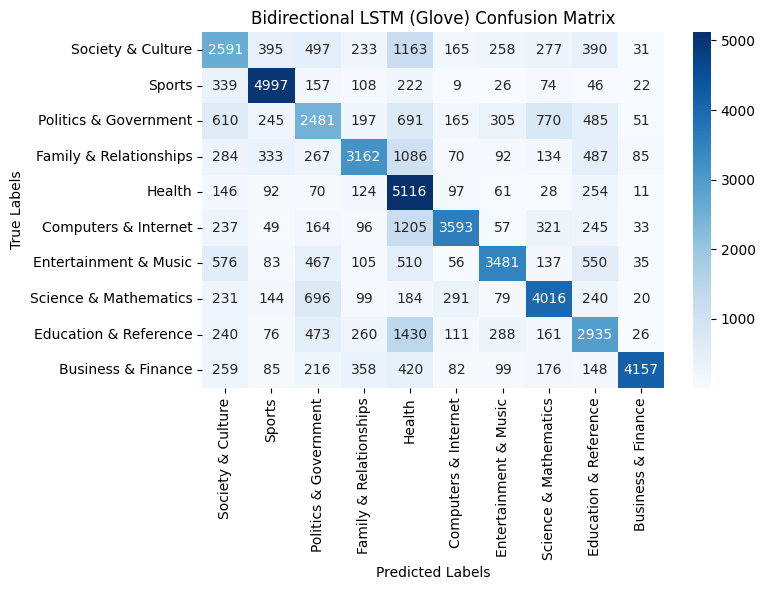

In [35]:
# Build BiLSTM model
model_bilstm = Sequential()
model_bilstm.add(Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           weights=[embedding_matrix],
                           input_length=X_train_glove.shape[1],
                           trainable=False))
model_bilstm.add(Bidirectional(LSTM(128)))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(y_train_cat.shape[1], activation="softmax"))

model_bilstm.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_bilstm.fit(X_train_glove, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_bilstm.predict(X_test_glove)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("BiLSTM Accuracy:", accuracy_score(y_true, y_pred))
print("BiLSTM F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("BiLSTM F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Bidirectional LSTM (Glove) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

BiLSTM Skipgram

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
BiLSTM Accuracy: 0.47607460124335405
BiLSTM F1 (macro): 0.47575866181072435
BiLSTM F1 (weighted): 0.47575979022412584

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.33      0.35      6000
           1       0.56      0.81      0.66      6000
           2       0.49      0.28      0.36      6000
           3       0.34      0.70      0.46      6000
           4       0.74      0.28      0.41      5999
           5       0.83      0.33      0.48      6000
           6       0.57      0.48      0.52      6000
           7       0.79      0.28      0.41      6000
           8       0.27      0.60      0.37      6000
           9       0.86      0.66      0.75      6000

    accuracy                           0.48     59999
   macro avg       0.58      0.48      0.48     59999
weighted avg       0.58      0.48      0.48     59999



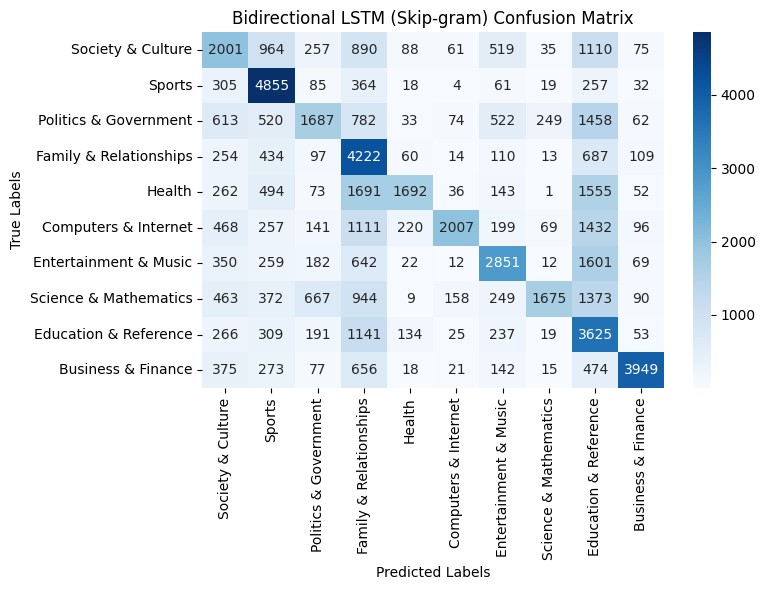

In [36]:
# Build BiLSTM model
model_bilstm = Sequential()
model_bilstm.add(Embedding(input_dim=vocab_size,
                           output_dim=skipgram_embedding_dim,
                           weights=[skipgram_embedding],
                           input_length=X_train_skipgram.shape[1],
                           trainable=False))
model_bilstm.add(Bidirectional(LSTM(128)))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(y_train_cat.shape[1], activation="softmax"))

model_bilstm.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model_bilstm.fit(X_train_skipgram, y_train_cat, validation_split=0.2, epochs=5, batch_size=32, verbose=0)

# Evaluate
y_pred_probs = model_bilstm.predict(X_test_skipgram)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("BiLSTM Accuracy:", accuracy_score(y_true, y_pred))
print("BiLSTM F1 (macro):", f1_score(y_true, y_pred, average="macro"))
print("BiLSTM F1 (weighted):", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm= confusion_matrix(y_true, y_pred)
class_names = ["Society & Culture","Sports","Politics & Government","Family & Relationships","Health","Computers & Internet","Entertainment & Music","Science & Mathematics","Education & Reference","Business & Finance"]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title("Bidirectional LSTM (Skip-gram) Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()